General Information

The below link was used to assist in the creation of the neural network:

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

Download Libraries and Data

In [840]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline
import category_encoders as ce

In [841]:
df = pd.read_excel('Fear of HH Members Data.xlsx')

In [842]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns

Index(['housheold_id', 'parents_in_household', 'currently_enrolled_in_school',
       'been_to_hospital_or_seen_a_health_worker_past_12_months',
       'being_punished_by_household_members',
       'punishment_past_30_days:_verbally_reprimanded',
       'punishment_past_30_days:_cursed_or_insulted',
       'being_afraid_of_household_members',
       'contact_with_parents_past_12_months_among_relocated_children',
       'gender', 'age', 'hours_spend_on_domestic_work_last_weekday',
       'hours_spend_on_domestic_work_last_saturday',
       'hours_spend_on_domestic_work_last_sunday',
       'total_household_income_last_month',
       'contact_with_parents_past_12_months_among_relocated_children.1',
       'hours_of_sleep_per_night', 'roster_id_of_rsi_responsent', 'roster_id'],
      dtype='object')

Data Overview

In [843]:
df.head()

,housheold_id,parents_in_household,currently_enrolled_in_school,been_to_hospital_or_seen_a_health_worker_past_12_months,being_punished_by_household_members,punishment_past_30_days:_verbally_reprimanded,punishment_past_30_days:_cursed_or_insulted,being_afraid_of_household_members,contact_with_parents_past_12_months_among_relocated_children,gender,age,hours_spend_on_domestic_work_last_weekday,hours_spend_on_domestic_work_last_saturday,hours_spend_on_domestic_work_last_sunday,total_household_income_last_month,contact_with_parents_past_12_months_among_relocated_children.1,hours_of_sleep_per_night,roster_id_of_rsi_responsent,roster_id
0,HH_key,MI05,AE03,HT02,HT05,HT06,HT07,HT18,HT66,HR04,HR05,LD21,LD22,LD23,HE57new,HT66new,HourSleep,AS11,HR01
1,1001_1309,None,No,No,Never,NaN,NaN,Always,NaN,Female,28,NaN,NaN,NaN,10001-20000 HTG,NaN,NaN,3,1
2,1001_1309,None,No,No,Never,NaN,NaN,Always,NaN,Male,30,NaN,NaN,NaN,10001-20000 HTG,NaN,NaN,3,2
3,1001_1309,None,No,No,Never,NaN,NaN,Always,NaN,Female,17,5,4,2,10001-20000 HTG,NaN,9-11 hours,3,3
4,1002_1374,None,Yes,Yes,Never,NaN,NaN,Never,Yes,Female,46,NaN,NaN,NaN,2501-5000 HTG,Daily,NaN,3,1


In [844]:
df.describe()

,housheold_id,parents_in_household,currently_enrolled_in_school,been_to_hospital_or_seen_a_health_worker_past_12_months,being_punished_by_household_members,punishment_past_30_days:_verbally_reprimanded,punishment_past_30_days:_cursed_or_insulted,being_afraid_of_household_members,contact_with_parents_past_12_months_among_relocated_children,gender,age,hours_spend_on_domestic_work_last_weekday,hours_spend_on_domestic_work_last_saturday,hours_spend_on_domestic_work_last_sunday,total_household_income_last_month,contact_with_parents_past_12_months_among_relocated_children.1,hours_of_sleep_per_night,roster_id_of_rsi_responsent,roster_id
count,10877,9366,9363,9363,9351,6761,6761,9333,4708,10877,10876,3480,3481,3493,10243,4693,3447,9502,10877
unique,2079,5,3,3,4,3,3,4,3,3,96,16,17,14,6,6,5,15,19
top,5227_582,None,Yes,No,Sometimes,No,No,Never,Yes,Female,14,0,0,0,0-2500 HTG,Weekly,9-11 hours,4,1
freq,18,5439,6888,7256,5825,3784,5642,5716,3860,5734,318,1244,1060,1377,3961,1417,2349,1948,2078


In [845]:
df = df.iloc[1:,:]
df.head()

,housheold_id,parents_in_household,currently_enrolled_in_school,been_to_hospital_or_seen_a_health_worker_past_12_months,being_punished_by_household_members,punishment_past_30_days:_verbally_reprimanded,punishment_past_30_days:_cursed_or_insulted,being_afraid_of_household_members,contact_with_parents_past_12_months_among_relocated_children,gender,age,hours_spend_on_domestic_work_last_weekday,hours_spend_on_domestic_work_last_saturday,hours_spend_on_domestic_work_last_sunday,total_household_income_last_month,contact_with_parents_past_12_months_among_relocated_children.1,hours_of_sleep_per_night,roster_id_of_rsi_responsent,roster_id
1,1001_1309,None,No,No,Never,NaN,NaN,Always,NaN,Female,28,NaN,NaN,NaN,10001-20000 HTG,NaN,NaN,3,1
2,1001_1309,None,No,No,Never,NaN,NaN,Always,NaN,Male,30,NaN,NaN,NaN,10001-20000 HTG,NaN,NaN,3,2
3,1001_1309,None,No,No,Never,NaN,NaN,Always,NaN,Female,17,5,4,2,10001-20000 HTG,NaN,9-11 hours,3,3
4,1002_1374,None,Yes,Yes,Never,NaN,NaN,Never,Yes,Female,46,NaN,NaN,NaN,2501-5000 HTG,Daily,NaN,3,1
5,1002_1374,None,Yes,Yes,Never,NaN,NaN,Never,Yes,Male,22,NaN,NaN,NaN,2501-5000 HTG,Daily,NaN,3,2


In [846]:
df.isnull().sum(axis = 0)

housheold_id                                                         0
parents_in_household                                              1511
currently_enrolled_in_school                                      1514
been_to_hospital_or_seen_a_health_worker_past_12_months           1514
being_punished_by_household_members                               1526
punishment_past_30_days:_verbally_reprimanded                     4116
punishment_past_30_days:_cursed_or_insulted                       4116
being_afraid_of_household_members                                 1544
contact_with_parents_past_12_months_among_relocated_children      6169
gender                                                               0
age                                                                  1
hours_spend_on_domestic_work_last_weekday                         7397
hours_spend_on_domestic_work_last_saturday                        7396
hours_spend_on_domestic_work_last_sunday                          7384
total_

Data Cleaning

In [847]:
df = df[df['roster_id_of_rsi_responsent'] == df['roster_id']]

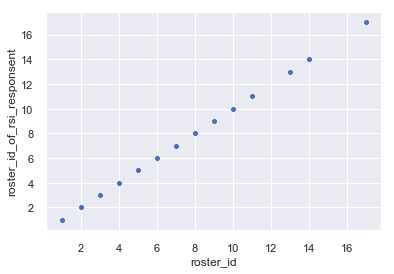

In [848]:
sns.scatterplot(data = df, y = 'roster_id_of_rsi_responsent', x = 'roster_id')

In [849]:
df = df.dropna(axis=0, subset=['being_afraid_of_household_members'])
df['being_afraid_of_household_members'].value_counts(dropna = False)

Never        988
Sometimes    348
Always       275
Name: being_afraid_of_household_members, dtype: int64

In [850]:
pp.ProfileReport(df)

Number of variables,20
Number of observations,1611
Total Missing (%),8.3%
Total size in memory,251.8 KiB
Average record size in memory,160.0 B
Numeric,7
Categorical,12
Boolean,0
Date,0
Text (Unique),1
Rejected,0


Data Cleaning

In [851]:
df.isnull().sum(axis = 0)

housheold_id                                                        0
parents_in_household                                                0
currently_enrolled_in_school                                        0
been_to_hospital_or_seen_a_health_worker_past_12_months             0
being_punished_by_household_members                                 2
punishment_past_30_days:_verbally_reprimanded                     458
punishment_past_30_days:_cursed_or_insulted                       458
being_afraid_of_household_members                                   0
contact_with_parents_past_12_months_among_relocated_children      778
gender                                                              0
age                                                                 0
hours_spend_on_domestic_work_last_weekday                          23
hours_spend_on_domestic_work_last_saturday                         23
hours_spend_on_domestic_work_last_sunday                           20
total_household_inco

In [852]:
pd.crosstab(df['punishment_past_30_days:_verbally_reprimanded'], 
            [df['being_punished_by_household_members']], dropna=False)

being_punished_by_household_members,Never,Often,Sometimes
punishment_past_30_days:_verbally_reprimanded,,,
No,0,50,611
Yes,0,102,390


In [853]:
df['punishment_past_30_days:_verbally_reprimanded'] = df['punishment_past_30_days:_verbally_reprimanded'
                                                        ].fillna('Not Punished')
df['punishment_past_30_days:_cursed_or_insulted'] = df['punishment_past_30_days:_cursed_or_insulted'
                                                        ].fillna('Not Punished')

In [854]:
pd.crosstab(df['punishment_past_30_days:_verbally_reprimanded'], 
            [df['being_punished_by_household_members']], dropna=True)

being_punished_by_household_members,Never,Often,Sometimes
punishment_past_30_days:_verbally_reprimanded,,,
No,0,50,611
Not Punished,456,0,0
Yes,0,102,390


In [855]:
df['contact_with_parents_past_12_months_among_relocated_children'] = df['contact_with_parents_past_12_months_among_relocated_children'
                                                        ].fillna('Did Not Relocate')
df['contact_with_parents_past_12_months_among_relocated_children.1'] = df['contact_with_parents_past_12_months_among_relocated_children.1'
                                                        ].fillna('Did Not Relocate')

In [856]:
def relocate(x):
    if x == 'Did Not Relocate':
        return 'No'
    else:
        return 'Yes'

In [857]:
df['Relocated_Child'] = df['contact_with_parents_past_12_months_among_relocated_children'].apply(lambda x: relocate(x))

In [858]:
df = df[pd.notnull(df['total_household_income_last_month'])]
df['total_household_income_last_month'].value_counts(dropna = False)

0-2500 HTG         605
2501-5000 HTG      405
5001-10000 HTG     256
10001-20000 HTG    140
20001+ HTG         117
Name: total_household_income_last_month, dtype: int64

In [859]:
for x in df.columns:
    if x == 'housheold_id':
        pass
    else:
        y = df[x].mode().iloc[0]
        df[x] = df[x].fillna(y)

In [860]:
df.isnull().sum(axis = 0)

housheold_id                                                      0
parents_in_household                                              0
currently_enrolled_in_school                                      0
been_to_hospital_or_seen_a_health_worker_past_12_months           0
being_punished_by_household_members                               0
punishment_past_30_days:_verbally_reprimanded                     0
punishment_past_30_days:_cursed_or_insulted                       0
being_afraid_of_household_members                                 0
contact_with_parents_past_12_months_among_relocated_children      0
gender                                                            0
age                                                               0
hours_spend_on_domestic_work_last_weekday                         0
hours_spend_on_domestic_work_last_saturday                        0
hours_spend_on_domestic_work_last_sunday                          0
total_household_income_last_month               

In [861]:
df['total_household_income_last_month'].value_counts()

0-2500 HTG         605
2501-5000 HTG      405
5001-10000 HTG     256
10001-20000 HTG    140
20001+ HTG         117
Name: total_household_income_last_month, dtype: int64

In [862]:
df['hours_of_sleep_per_night'].value_counts()

9-11 hours    1051
6-8 hours      401
12+ hours       67
3-5 hours        4
Name: hours_of_sleep_per_night, dtype: int64

In [863]:
def to_numerical(x):
    if '-' in x:
        return x.split('-',1)[0]
    else:
        return x.split('+',1)[0]

In [864]:
df['HH_Income_Last_Month'] = df['total_household_income_last_month'].apply(lambda x:
                                                                           to_numerical(x))
df['Hours_Sleep'] = df['hours_of_sleep_per_night'].apply(lambda x: to_numerical(x))

In [865]:
df['HH_Income_Last_Month'].value_counts()

0        605
2501     405
5001     256
10001    140
20001    117
Name: HH_Income_Last_Month, dtype: int64

In [866]:
df['Hours_Sleep'].value_counts()

9     1051
6      401
12      67
3        4
Name: Hours_Sleep, dtype: int64

In [867]:
df['Hours_Sleep'] = df['Hours_Sleep'].apply(lambda x: float(x))
df['HH_Income_Last_Month'] = df['HH_Income_Last_Month'].apply(lambda x: float(x))

In [868]:
df.dtypes

housheold_id                                                       object
parents_in_household                                               object
currently_enrolled_in_school                                       object
been_to_hospital_or_seen_a_health_worker_past_12_months            object
being_punished_by_household_members                                object
punishment_past_30_days:_verbally_reprimanded                      object
punishment_past_30_days:_cursed_or_insulted                        object
being_afraid_of_household_members                                  object
contact_with_parents_past_12_months_among_relocated_children       object
gender                                                             object
age                                                                 int64
hours_spend_on_domestic_work_last_weekday                           int64
hours_spend_on_domestic_work_last_saturday                          int64
hours_spend_on_domestic_work_last_sund

In [869]:
df = df.drop(['total_household_income_last_month', 'hours_of_sleep_per_night'],
            axis = 1)

In [870]:
df['Ttl_Working_Hrs'] = df['hours_spend_on_domestic_work_last_weekday'] + df['hours_spend_on_domestic_work_last_saturday']
+ df['hours_spend_on_domestic_work_last_sunday']
df = df.drop(['hours_spend_on_domestic_work_last_weekday', 'hours_spend_on_domestic_work_last_saturday', 
             'hours_spend_on_domestic_work_last_sunday'], axis = 1)

Data Analysis

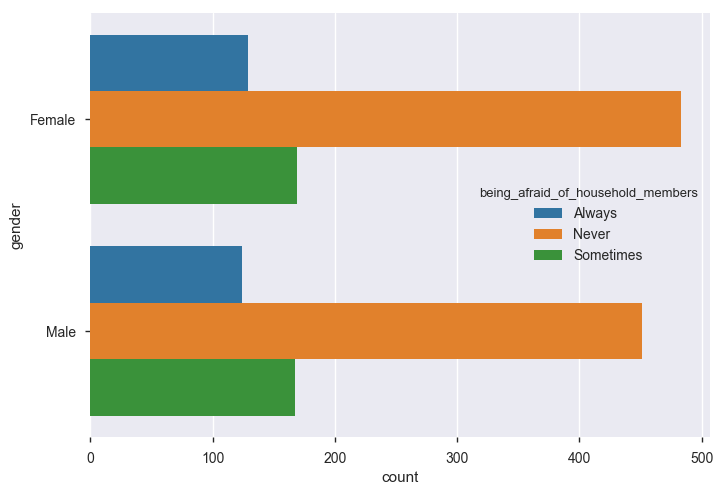

In [871]:
sns.countplot(data = df, y = 'gender', hue = 'being_afraid_of_household_members')

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


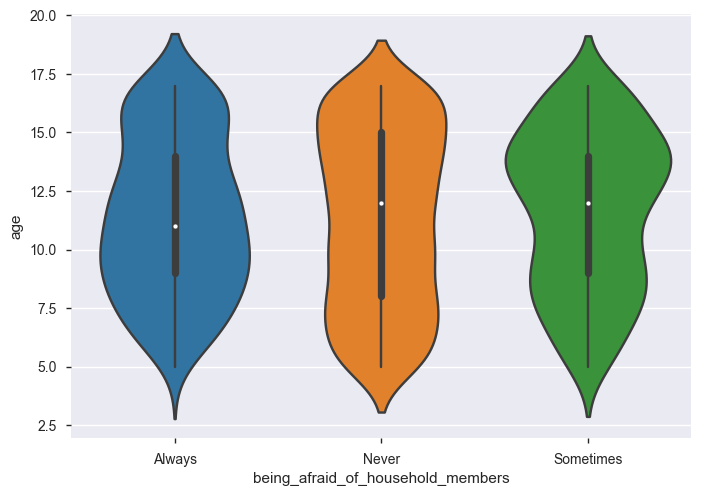

In [872]:
sns.violinplot(data=df, y='age', x='being_afraid_of_household_members')

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


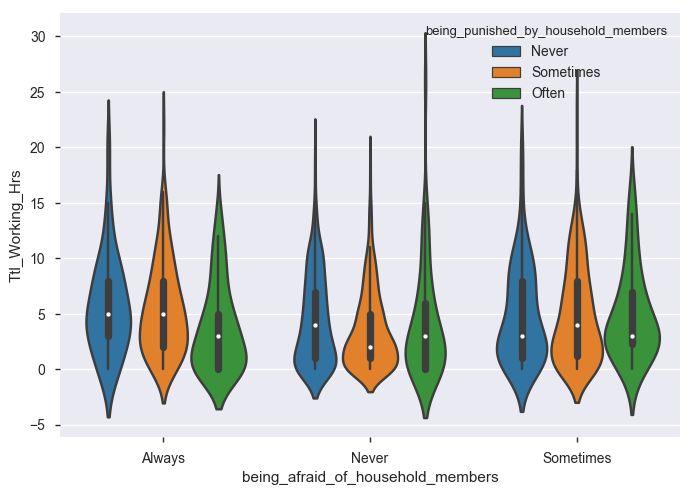

In [873]:
sns.violinplot(data=df, y='Ttl_Working_Hrs', x='being_afraid_of_household_members',
            hue='being_punished_by_household_members')

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


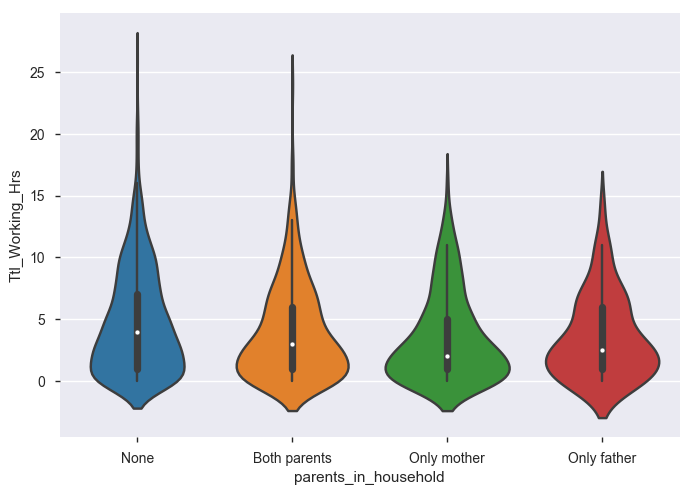

In [874]:
sns.violinplot(data=df, y='Ttl_Working_Hrs', x='parents_in_household')

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


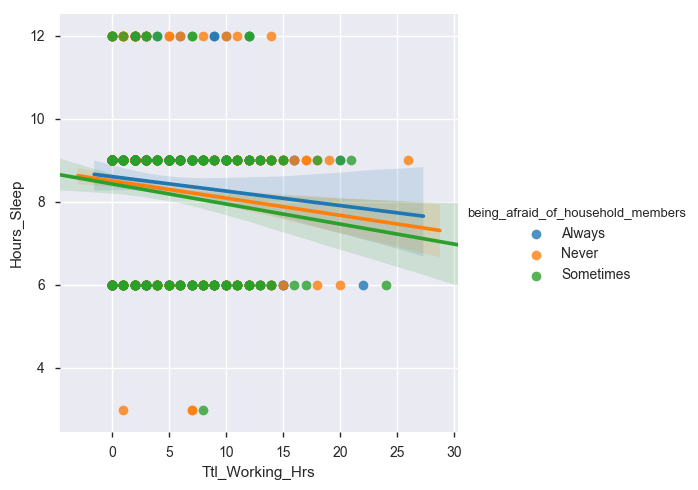

In [875]:
sns.lmplot(x='Ttl_Working_Hrs', y='Hours_Sleep', data=df, 
           hue='being_afraid_of_household_members')

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


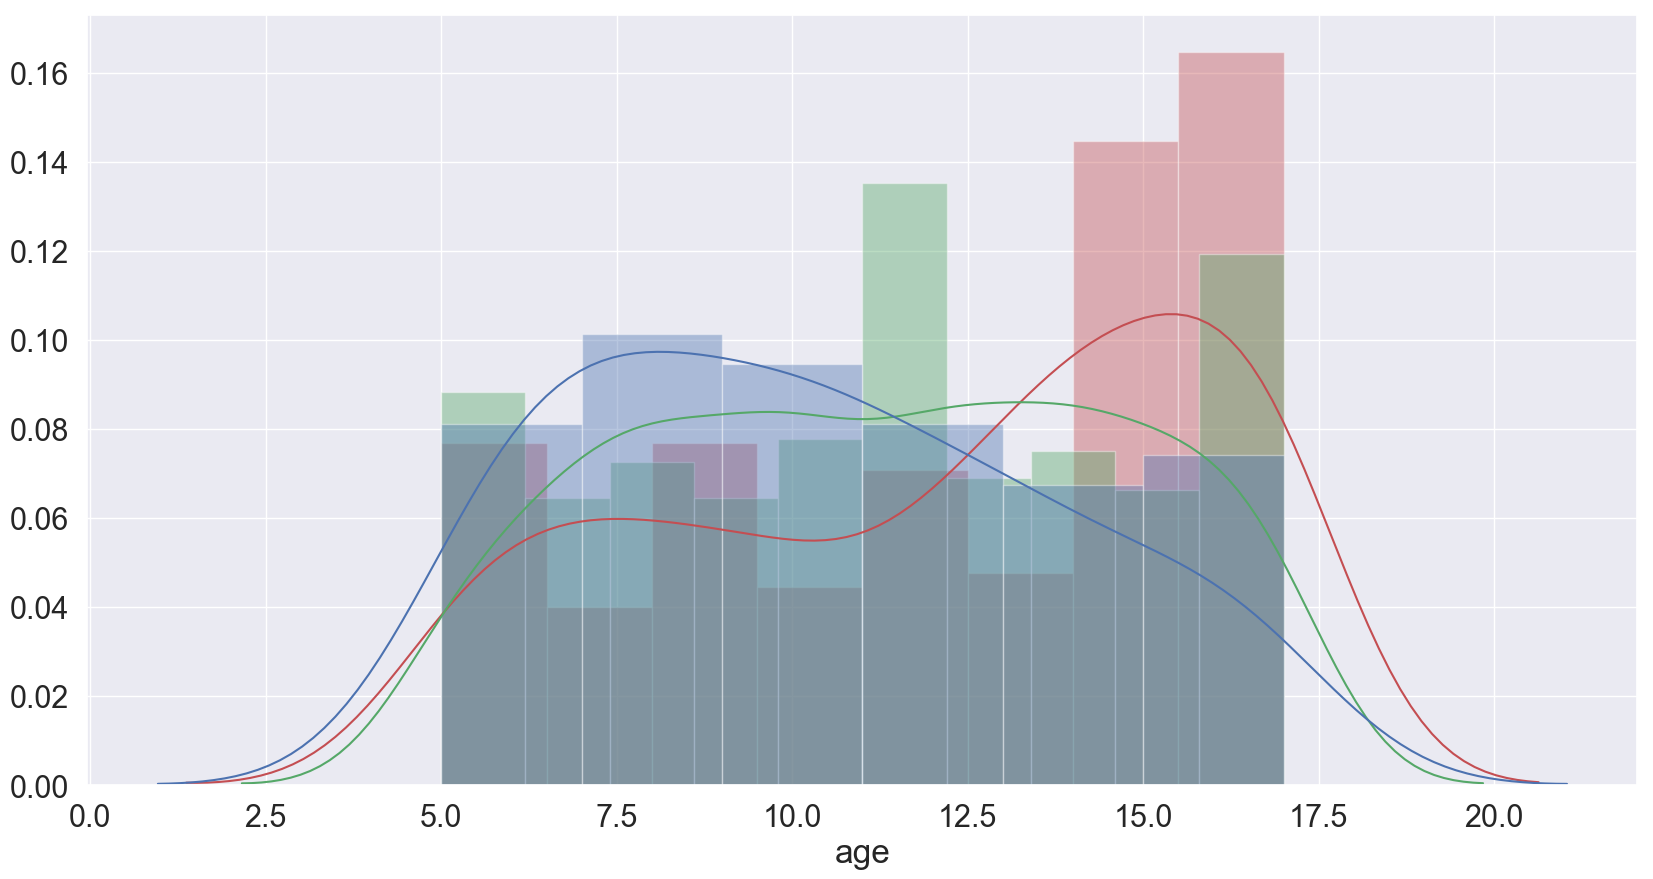

In [876]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.distplot(df[df['being_punished_by_household_members'] == 'Never'].age,color='r')#, hist=False)
sns.distplot(df[df['being_punished_by_household_members'] == 'Sometimes'].age,color='g')#, hist=False)
sns.distplot(df[df['being_punished_by_household_members'] == 'Often'].age,color='b')#, hist=False)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


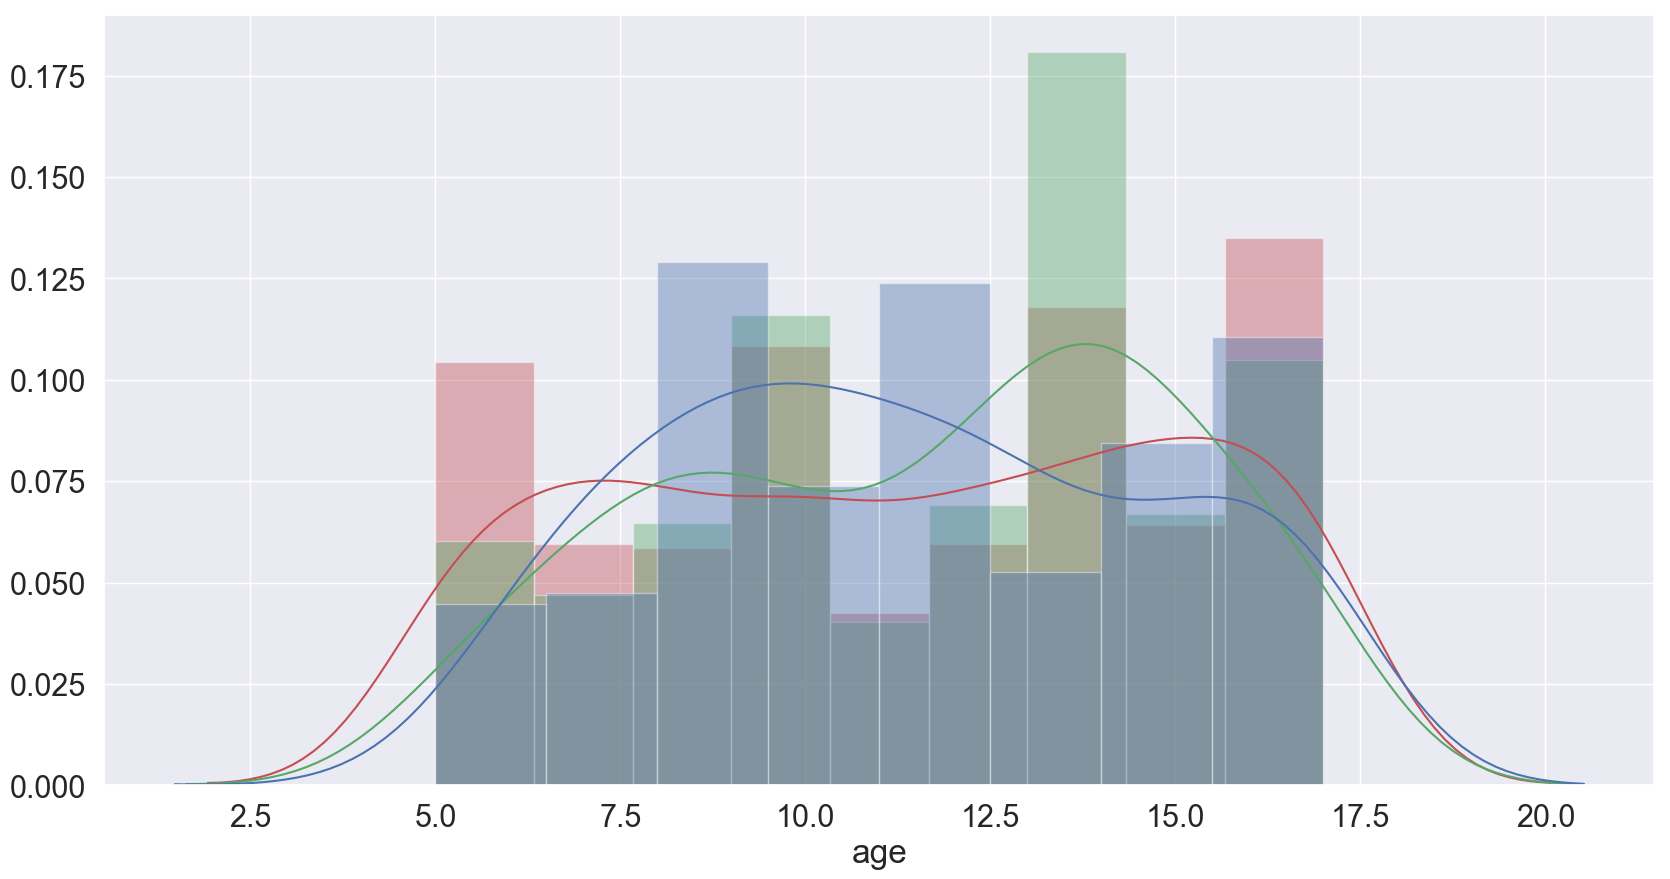

In [877]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.distplot(df[df['being_afraid_of_household_members'] == 'Never'].age,
             color='r')#, hist=False)
sns.distplot(df[df['being_afraid_of_household_members'] == 'Sometimes'].age,
             color='g')#, hist=False)
sns.distplot(df[df['being_afraid_of_household_members'] == 'Always'].age,
             color='b')#, hist=False)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


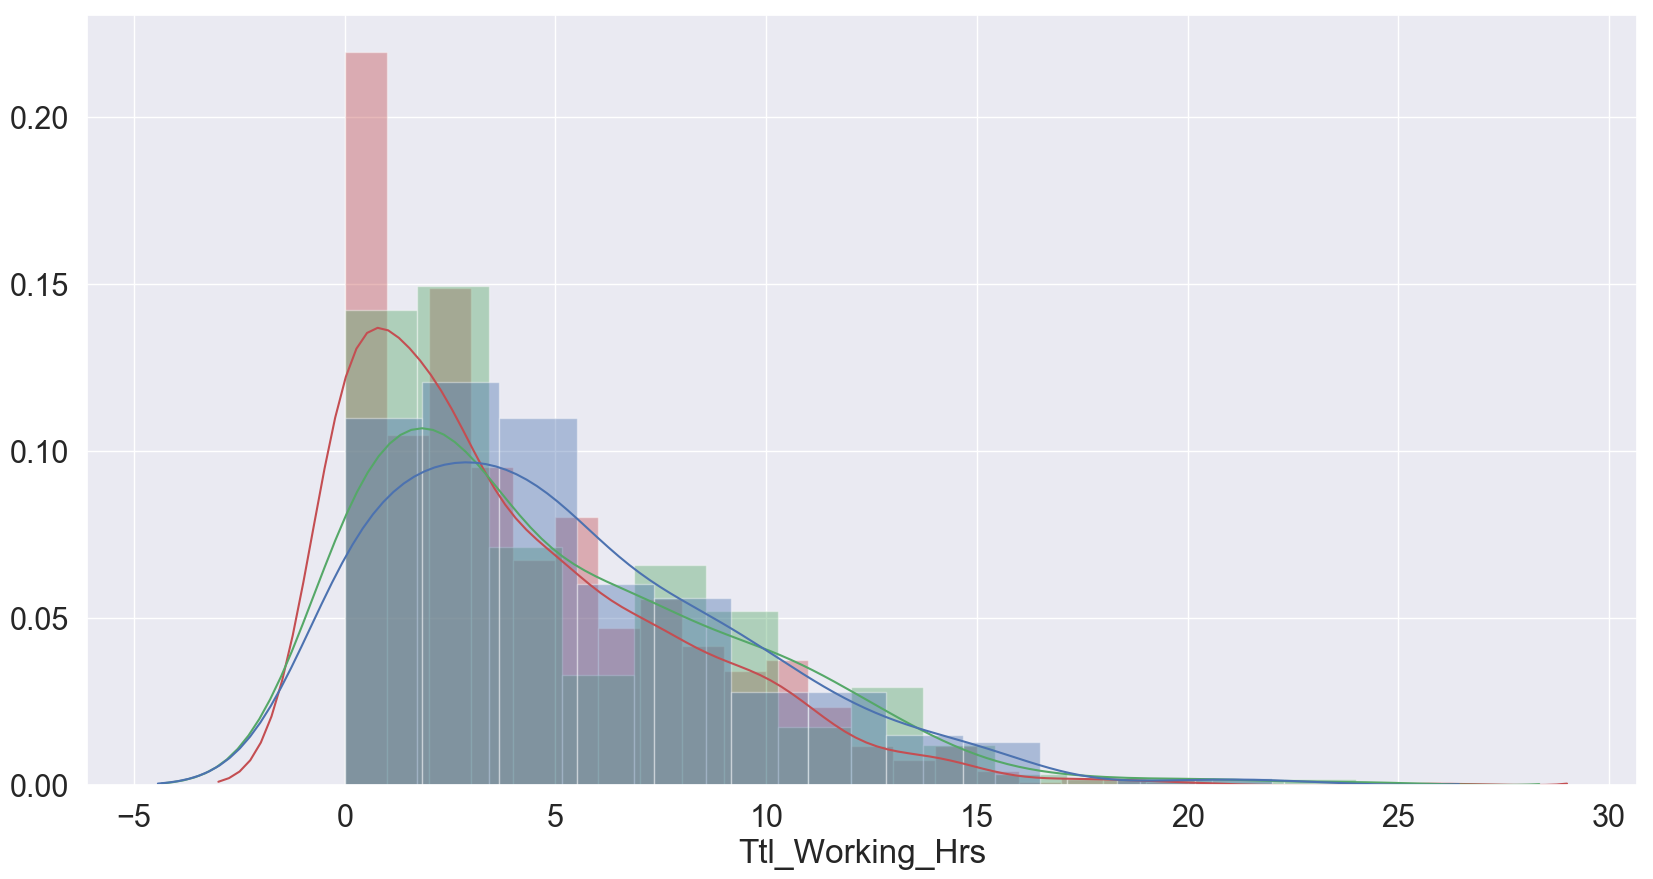

In [878]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.distplot(df[df['being_afraid_of_household_members'] == 'Never'].Ttl_Working_Hrs,
             color='r')#, hist=False)
sns.distplot(df[df['being_afraid_of_household_members'] == 'Sometimes'].Ttl_Working_Hrs,
             color='g')#, hist=False)
sns.distplot(df[df['being_afraid_of_household_members'] == 'Always'].Ttl_Working_Hrs,
             color='b')#, hist=False)
sns.set(font_scale=1)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


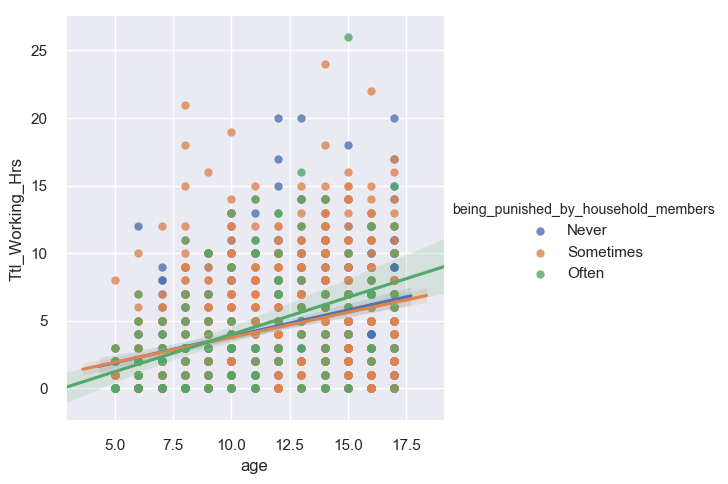

In [879]:
sns.lmplot(data=df, x='age', y='Ttl_Working_Hrs', 
           hue='being_punished_by_household_members')

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


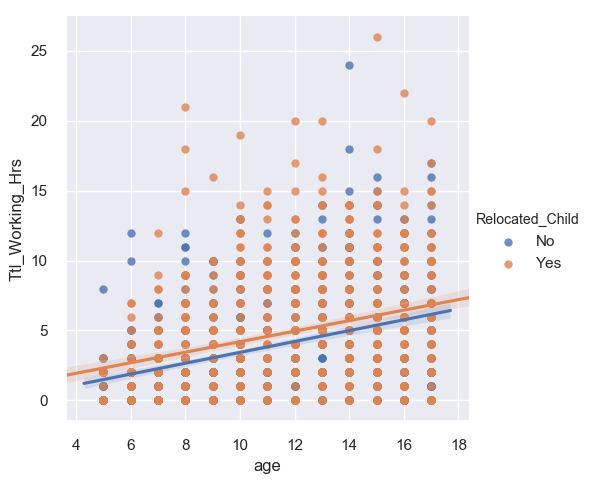

In [880]:
sns.lmplot(data=df, x='age', y='Ttl_Working_Hrs', 
           hue='Relocated_Child')

In [881]:
df_Fear_Al = df[df['being_afraid_of_household_members'] == 'Always']
df_Fear_Sm = df[df['being_afraid_of_household_members'] == 'Sometimes']
df_Fear_Nv = df[df['being_afraid_of_household_members'] == 'Never']

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


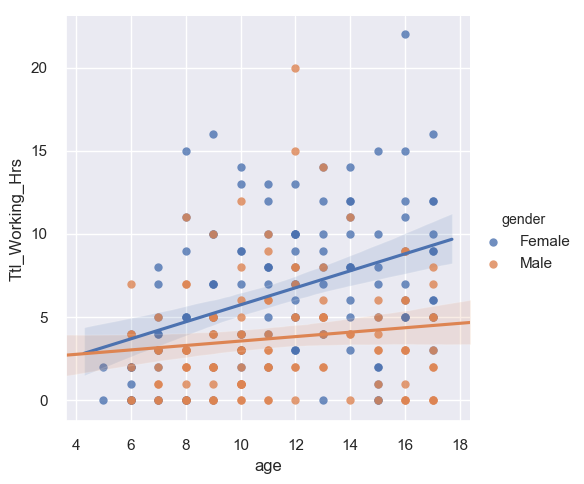

In [882]:
sns.lmplot(data=df_Fear_Al, x='age', y='Ttl_Working_Hrs', 
           hue='gender')

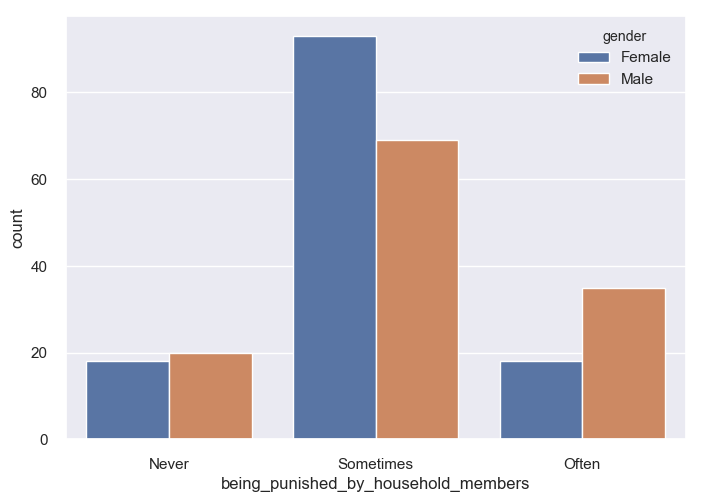

In [883]:
sns.countplot(data=df_Fear_Al, x='being_punished_by_household_members',
           hue='gender')

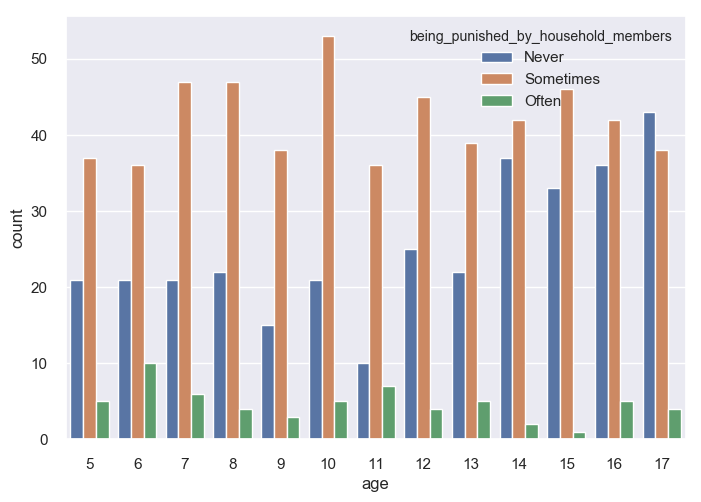

In [884]:
sns.countplot(data= df_Fear_Nv, x= 'age', hue='being_punished_by_household_members')

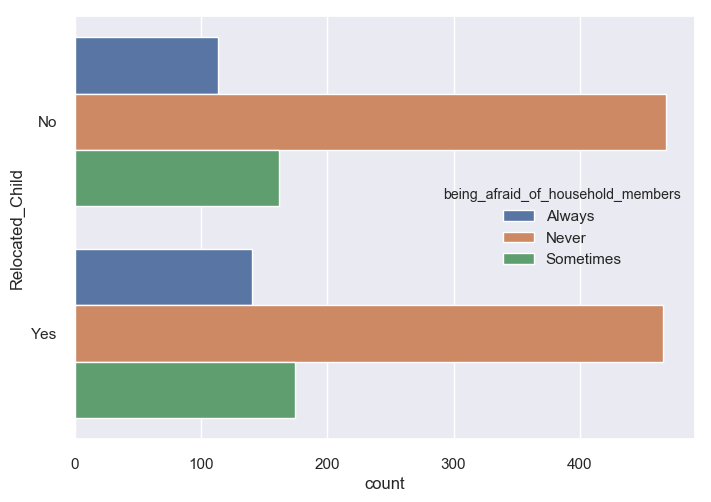

In [885]:
sns.countplot(data= df, y= 'Relocated_Child', 
              hue='being_afraid_of_household_members')

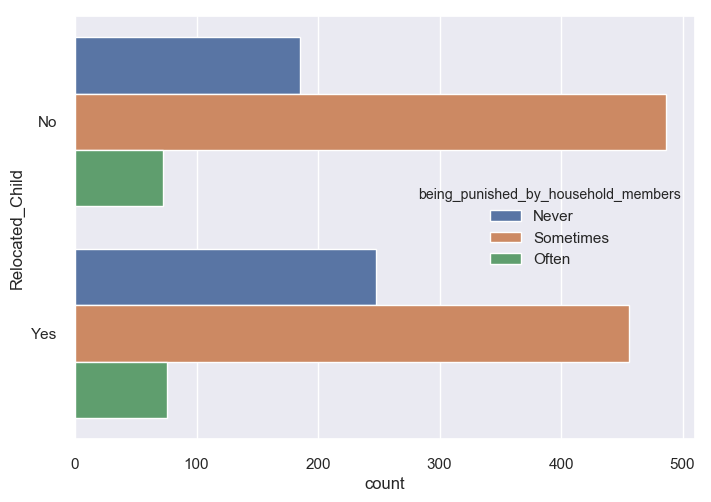

In [886]:
sns.countplot(data= df, y= 'Relocated_Child', 
              hue='being_punished_by_household_members')

In [887]:
pd.crosstab(df.Relocated_Child, df.gender, normalize=True).style.background_gradient(
    cmap='magma', low=.5, high=0).highlight_null('red')

gender,Female,Male
Relocated_Child,,
No,0.238345,0.249508
Yes,0.274458,0.237689


/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


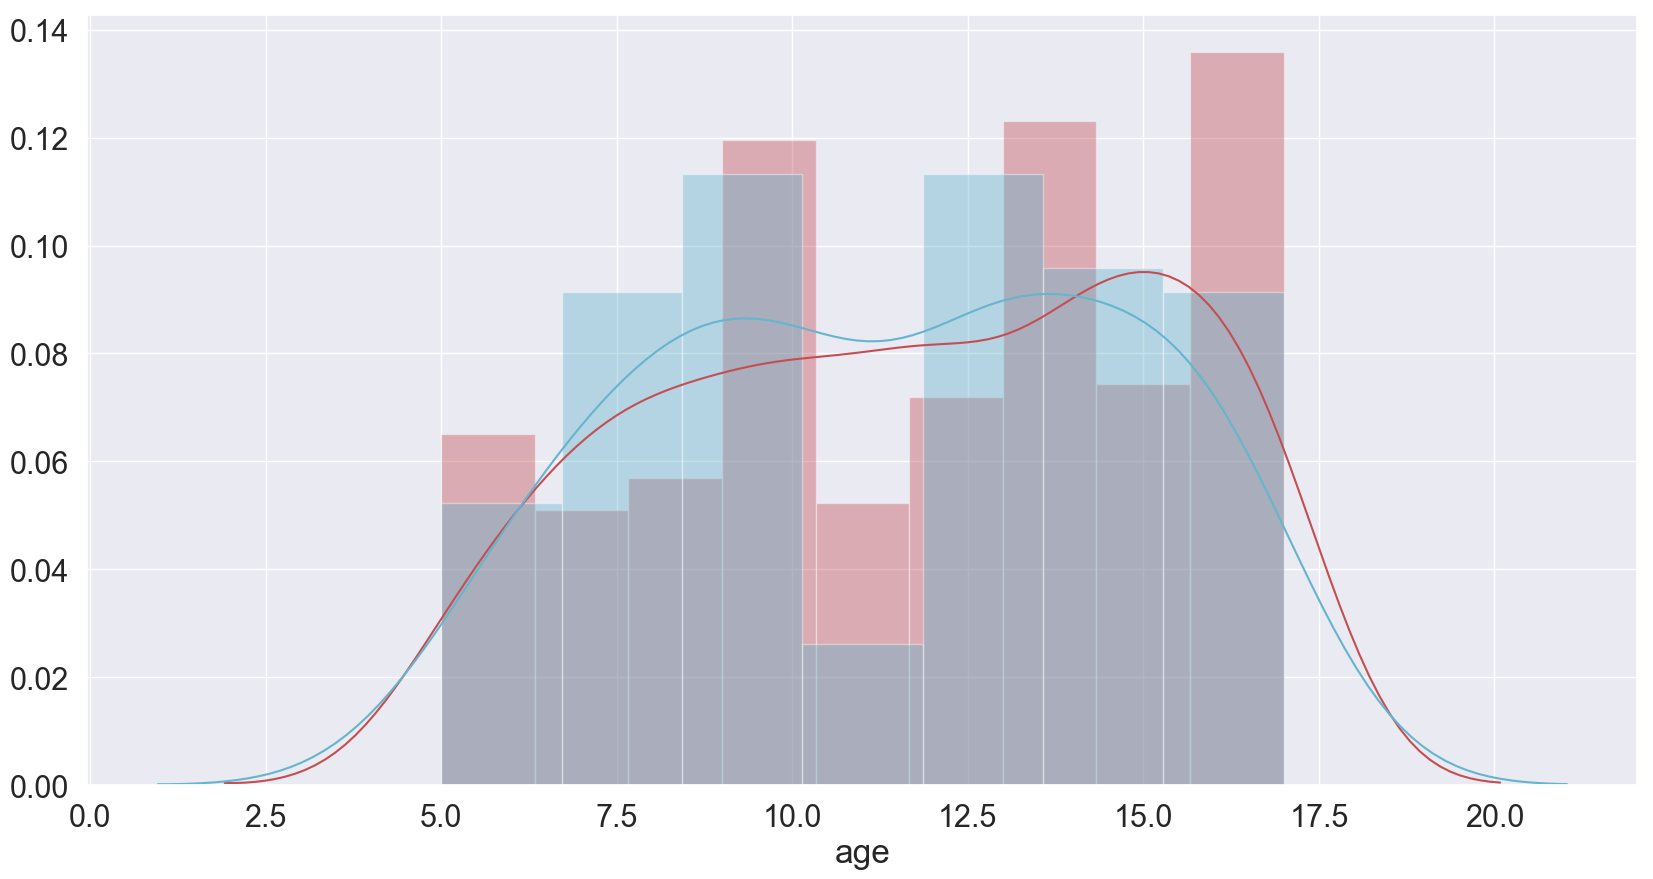

In [888]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.distplot(df[df['contact_with_parents_past_12_months_among_relocated_children'] == 
                'Yes'].age,color='r')#, hist=False)
sns.distplot(df[df['contact_with_parents_past_12_months_among_relocated_children'] == 
                'No'].age,color='c')#, hist=False)
sns.set(font_scale=1)

Modeling

In [889]:
df = df.drop(['housheold_id', 'punishment_past_30_days:_verbally_reprimanded',
             'punishment_past_30_days:_cursed_or_insulted', 'contact_with_parents_past_12_months_among_relocated_children',
             'contact_with_parents_past_12_months_among_relocated_children.1','roster_id_of_rsi_responsent',
             'roster_id'], axis = 1)

In [890]:
df['being_afraid_of_household_members'].value_counts()

Never        934
Sometimes    336
Always       253
Name: being_afraid_of_household_members, dtype: int64

In [891]:
def HH_Fear(x):
    if x == 'Never':
        return 0
    else:
        return 1

In [892]:
df['Child_Fear_of_HH'] = df['being_afraid_of_household_members'].apply(lambda x: 
                                                                         HH_Fear(x))
df['Child_Fear_of_HH'].head()

3     1
6     0
10    1
17    1
24    1
Name: Child_Fear_of_HH, dtype: int64

In [893]:
df = df.drop(['being_afraid_of_household_members'], axis = 1)

In [894]:
X = df.iloc[:,:10]
y = df.iloc[:,10:]
X.head(1)

,parents_in_household,currently_enrolled_in_school,been_to_hospital_or_seen_a_health_worker_past_12_months,being_punished_by_household_members,gender,age,Relocated_Child,HH_Income_Last_Month,Hours_Sleep,Ttl_Working_Hrs
3,None,No,No,Never,Female,17,No,10001.0,9.0,9


In [895]:
y.head(1)

,Child_Fear_of_HH
3,1


In [896]:
X.dtypes

parents_in_household                                        object
currently_enrolled_in_school                                object
been_to_hospital_or_seen_a_health_worker_past_12_months     object
being_punished_by_household_members                         object
gender                                                      object
age                                                          int64
Relocated_Child                                             object
HH_Income_Last_Month                                       float64
Hours_Sleep                                                float64
Ttl_Working_Hrs                                              int64
dtype: object

In [897]:
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
X = ohe.fit_transform(X)
X.head()

,parents_in_household_None,parents_in_household_Both parents,parents_in_household_Only mother,parents_in_household_Only father,currently_enrolled_in_school_No,currently_enrolled_in_school_Yes,been_to_hospital_or_seen_a_health_worker_past_12_months_No,been_to_hospital_or_seen_a_health_worker_past_12_months_Yes,being_punished_by_household_members_Never,being_punished_by_household_members_Sometimes,being_punished_by_household_members_Often,gender_Female,gender_Male,Relocated_Child_No,Relocated_Child_Yes,age,HH_Income_Last_Month,Hours_Sleep,Ttl_Working_Hrs
3,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,17,10001.0,9.0,9
6,1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,15,2501.0,6.0,4
10,1,0,0,0,0,1,0,1,1,0,0,0,1,1,0,17,20001.0,6.0,1
17,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,14,5001.0,6.0,8
24,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,8,5001.0,9.0,3


In [898]:
X.columns

Index(['parents_in_household_None', 'parents_in_household_Both parents',
       'parents_in_household_Only mother', 'parents_in_household_Only father',
       'currently_enrolled_in_school_No', 'currently_enrolled_in_school_Yes',
       'been_to_hospital_or_seen_a_health_worker_past_12_months_No',
       'been_to_hospital_or_seen_a_health_worker_past_12_months_Yes',
       'being_punished_by_household_members_Never',
       'being_punished_by_household_members_Sometimes',
       'being_punished_by_household_members_Often', 'gender_Female',
       'gender_Male', 'Relocated_Child_No', 'Relocated_Child_Yes', 'age',
       'HH_Income_Last_Month', 'Hours_Sleep', 'Ttl_Working_Hrs'],
      dtype='object')

In [899]:
X = X.drop(['parents_in_household_None', 'currently_enrolled_in_school_No',
            'been_to_hospital_or_seen_a_health_worker_past_12_months_No',
             'being_punished_by_household_members_Sometimes', 'gender_Male',
             'Relocated_Child_No', ], axis =1)

In [900]:
def age_cutoff(x):
    if x > 13:
        return 1
    else:
        return 0
    
df['Over_13'] = df['age'].apply(lambda x: age_cutoff(x))
X = X.drop(['age'], axis =1)

In [908]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [909]:
Inputs = X.shape[1]
model = Sequential()
model.add(Dense(12, input_dim=Inputs, activation='relu'))
model.add(Dense(Inputs, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 12)                156       
_________________________________________________________________
dense_122 (Dense)            (None, 12)                156       
_________________________________________________________________
dense_123 (Dense)            (None, 1)                 13        
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________
None


In [911]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [912]:
model.fit(X, y, epochs=100, batch_size=10)

Epoch 1/100
1523/1523 [==============================] - 2s 1ms/step - loss: 4.0484 - acc: 0.6093
Epoch 2/100
1523/1523 [==============================] - 0s 295us/step - loss: 4.0479 - acc: 0.6205
Epoch 3/100
1523/1523 [==============================] - 0s 301us/step - loss: 4.0444 - acc: 0.6231
Epoch 4/100
1523/1523 [==============================] - 0s 251us/step - loss: 4.0411 - acc: 0.6257
Epoch 5/100
1523/1523 [==============================] - 0s 273us/step - loss: 4.0395 - acc: 0.6297
Epoch 6/100
1523/1523 [==============================] - 0s 241us/step - loss: 4.0374 - acc: 0.6277
Epoch 7/100
1523/1523 [==============================] - 0s 246us/step - loss: 4.0356 - acc: 0.6264
Epoch 8/100
1523/1523 [==============================] - 0s 291us/step - loss: 4.0351 - acc: 0.6271
Epoch 9/100
1523/1523 [==============================] - 0s 254us/step - loss: 4.0328 - acc: 0.6297
Epoch 10/100
1523/1523 [==============================] - 0s 250us/step - loss: 4.0320 - acc: 0.6297
E

1523/1523 [==============================] - 0s 257us/step - loss: 4.0186 - acc: 0.6415
Epoch 83/100
1523/1523 [==============================] - 0s 262us/step - loss: 4.0195 - acc: 0.6349
Epoch 84/100
1523/1523 [==============================] - 0s 252us/step - loss: 4.0190 - acc: 0.6297
Epoch 85/100
1523/1523 [==============================] - 0s 244us/step - loss: 4.0187 - acc: 0.6376
Epoch 86/100
1523/1523 [==============================] - 0s 236us/step - loss: 4.0186 - acc: 0.6330
Epoch 87/100
1523/1523 [==============================] - 0s 251us/step - loss: 4.0189 - acc: 0.6336
Epoch 88/100
1523/1523 [==============================] - 0s 268us/step - loss: 4.0187 - acc: 0.6343
Epoch 89/100
1523/1523 [==============================] - 0s 259us/step - loss: 4.0181 - acc: 0.6382
Epoch 90/100
1523/1523 [==============================] - 0s 254us/step - loss: 4.0169 - acc: 0.6415
Epoch 91/100
1523/1523 [==============================] - 0s 253us/step - loss: 4.0162 - acc: 0.6369
Epo

In [913]:
scores = model.evaluate(X, y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1523/1523 [==============================] - 1s 406us/step

acc: 64.28%


Conclusions

Moving Forward